# Non-bonded Interactions

## Learning goals:

After working through this notebook, you will be able to:

1. Define terms: molecule, ion, covalent bond, ionic bond, polar bonds, polar molecules
2. Identify and describe six non-bonded interactions
3. Use and plot the 1d potential for dispersion, ion-ion, and polar non-bonded interactions

## Coding concepts:

The following coding concepts are used in this notebook:

1. [Variables](../coding_concepts/variables.ipynb)
2. [Functions](../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../coding_concepts/plotting_with_matplotlib.ipynb)

## Molecular Structure and Nomenclature

Before discussing type of non-bonded interactions, we must define some terms so that we are all on the same page.  

***Molecules*** are composed of atoms.  Some of the atoms in a molecule are held together by chemical bonds.  Chemical bonds can be either covalent (sharing electrons) or ionic (electrons transfer) in nature.  In either case, these bonds are typically very strong, requiring significant energy to break them.  

***Ions*** are atoms or molecules with a nonzero net charge.  If the atom or molecule has excess electrons, it is overall negatively charged and is called an anion.  If the atom or molecule has excess protons, it is overall positively charged and is called a cation.

***Polar bonds*** are covalent bonds between atoms of fairly different electronegativity.  In these cases, while the electrons are still shared between the two atoms to form a covalent bond, they are slightly more attracted to one atom than another.  This leads to a partial postive charge on one atom and a partial negative charge on another atom, or a dipole.  Some *examples of polar bonds* include O-H, N-H, C-O, and C=O.  Some examples of *non-polar bonds* include C-C, C-H, N-N, and H-H.

***Polar molecules*** are molecules with a *net* dipole moment.  This requires that there be either polar or ionic bonds in the molecule.  But having polar bonds does not imply the molecule will be polar.  CO$_2$ is an example of a molecule that is non-polar but contains polar bonds. Water and ammonia are examples of polar molecules. 

## Types of Non-bonded Interactions

The structure and function of biomolecules are strongly affected by nonbonded, or non-covalent, interactions.  Covalent bonds are formed between two atoms that share electrons.  Interactions between non-bonded atoms are referred to as non-bonded interactions. 

Non-bonded interactions can be divided into six types:

1. ***Dispersion*** (aka London dispersion forces).  These interactions occur between all molecules.  These are typically weak interactions that stem from induced dipole-induced dipole physics.
2. ***Ion-ion or Charge-charge***.  These strong and long-ranged interactions occur between two charged moieties.  These could be two charged molecules or two charged parts of a molecule.  The physics underlying these interactions is Coulomb's law.  
3. ***Polar*** (e.g. dipole-dipole).  Polar interactions refer to electrostatic interactions beyond monopole-monopole (charge-charge).  The strongest of these are monopole-dipole and dipole-dipole.  These interactions occur between two polar (non-charge symmetric) moieties.  
4. ***Hydrogen bonding***.  These interactions happen between two electronegative atoms and a hydrogen atom.  These are strong interactions but short-ranged.  Hydrogen bonds could also be refered to as polar interactions.  
5. ***Hydrophobic***.  These "interactions" exist between non-polar species solvated in water.  An interaction is termed hyrdophobic if the strength of interaction increases in the aqueous phase as compared to the gas phase.
6. ***Excluded Volume***.  This interaction occurs between all species.  It is the interaction that prevents two atoms from overlapping in space.  

### Dispersion interactions

Dispersion interactions are strictly attractive interactions that occur between all molecules.  They are particularly strong for polarizable molecules.  

Dispersion interactions play an important role in the interaction between non-polar species.  This is not necessarily because the dispersion interactions are strong for non-polar species but rather because non-polar species do not display stronger interactions such as ion-ion or polar.  For example, dispersion forces play a large role in the interaction between the lipid tails in a cell membrane.  The mainly aliphatic methylene groups are not particularly polarizable but the sheer number of these interactions between the long lipid tails does yield a sizable interaction strength.  

Dispersion interactions also play an important role in $\pi$-stacking.  Large $\pi$ systems are quite polarizable leading to a particularly strong dispersion interaction.  

The physics behind a dispersion interaction is induced dipole-induced dipole.  That is, if we consider an atom, molecule, or a component of a molecule to be a nucleus of positive charge with a electron cloud around it, there is a finite probability that the majority of the electron cloud will sit to one side of the nucleus. This will create a temporary dipole.  If there is a polarizable entity in the vicinity, that entity will polarize in the opposite direction to the temporary dipole stabilizing the temporary dipole and creating an attractive interaction between two polarizable electron clouds.  In the classical limit, this interaction goes as 
\begin{equation}
U(r) \propto \frac{-1}{r^6},
\end{equation}
where $r$ is the distance between the two polarizable clouds.  The proportionality constant will be dictated by the polarizability of the cloud.  

Below I plot two dispersion interactions.  One for aliphatic-aliphatic carbons and another for aromatic-aromatic carbons.

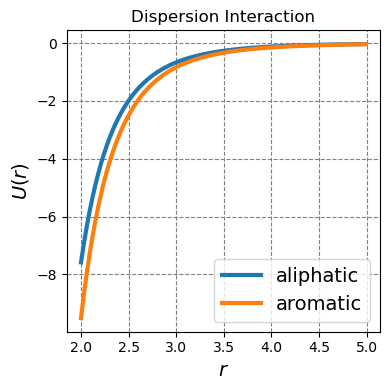

In [6]:
# opls parameters for different carbon types
eps_aliphatic = 0.066
sigma_aliphatic = 3.5
eps_arene = 0.076
sigma_arene = 3.55

def u_dispersion(r,sigma,epsilon):
    return -4*epsilon*(sigma/r)**6

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot 
fontsize=14
fig,ax = plt.subplots(1,1,figsize=(4,4), dpi= 100, facecolor='w', edgecolor='k')
ax.grid(which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$r$",size=fontsize)
ax.set_ylabel("$U(r)$",size=fontsize)
ax.set_title("Dispersion Interaction")
r = np.arange(2,5,0.01)
ax.plot(r,u_dispersion(r,sigma_aliphatic,eps_aliphatic),lw=3,label="aliphatic")
ax.plot(r,u_dispersion(r,sigma_arene,eps_arene),lw=3,label="aromatic")
plt.legend(fontsize=fontsize)
plt.tight_layout();

### Ion-ion interactions

Ion-ion or charge-charge interactions happen between two moieties each of which has an overall charge.  These interactions are typically strong and long-ranged and can be both attractive and replusive.  Opposite charges attract while like charges repel.  These types of interactions are typically well solvated by polar solvents such as water but still contribute significantly to molecular structure and reactivity.  

Salt bridges in proteins are an example of ion-ion interactions.  A salt bridge is an strong interaction between the two oppositely charge side chains in a protein.  Examples include arginine-aspartate, arginine-glutamate, lysine-aspartate, and lysine-glutamate.  In these cases, the functional groups on the side chains of arginine (guanadinium) and lysine (amino) are positively charged and the functional groups on the side chains of aspartate and glutamate (both carboxylate) are negatively charged.  These are also examples of hydrogen bonding.  

Ion-ion interactions also occur between small inorganic ions such as sodium (Na+) and chloride (Cl-).  These aqueous ions are also fairly prevelant in cells.


Two species with overall net charge will interact, in the classical limit, by a coulomb potental.  This potential is given as
\begin{equation}
U_{Coulomb}(r) = \frac{q_1q_2}{4\pi\epsilon_0r},
\end{equation}
where $q_1$ is the charge of ion 1, $q_2$ is the charge of ion 2, $\epsilon_0$ is the permitivity of free space (a constant), and $r$ is the distance between the two ions.  This can be readily plotted for two like and two oppositely charged ions.

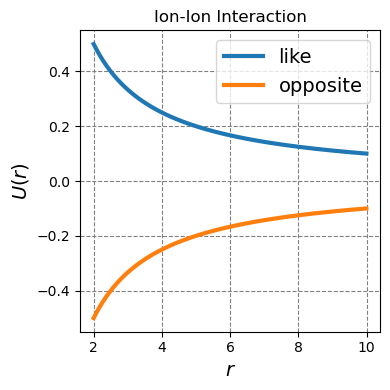

In [8]:
def u_coulomb(r,q1,q2):
    return q1*q2/r

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot 
fontsize=14
fig,ax = plt.subplots(1,1,figsize=(4,4), dpi= 100, facecolor='w', edgecolor='k')
ax.grid(which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$r$",size=fontsize)
ax.set_ylabel("$U(r)$",size=fontsize)
ax.set_title("Ion-Ion Interaction")
r = np.arange(2,10,0.01)
ax.plot(r,u_coulomb(r,1,1),lw=3,label="like")
ax.plot(r,u_coulomb(r,1,-1),lw=3,label="opposite")
plt.legend(fontsize=fontsize)
plt.tight_layout();

### Polar interactions

Polar interactions exist between polar molecules.  They are stronger and longer-ranged than dispersion interactions but weaker and shorter-ranged than ion-ion interactions.

These interactions exist between side chains of polar amino acids such as threonine, serine, asparagine and glutamine.  Physcially, the interaction goes as a dipole-diple interaction which technically has a distance and angle dependence.  If we ignore the angle dependence, the interaction strength goes as
\begin{equation}
U_{polar}(r) \propto -\frac{1}{r^3}
\end{equation}

Below you can see this type of interaction as a function $r$

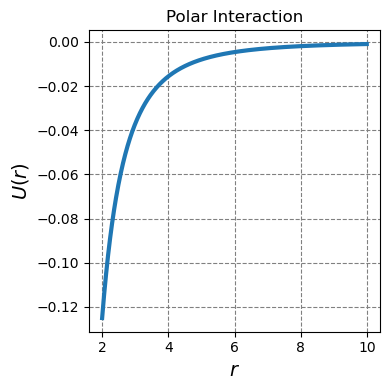

In [12]:
def u_dipole(r):
    return -1/r**3

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot 
fontsize=14
fig,ax = plt.subplots(1,1,figsize=(4,4), dpi= 100, facecolor='w', edgecolor='k')
ax.grid(which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$r$",size=fontsize)
ax.set_ylabel("$U(r)$",size=fontsize)
ax.set_title("Polar Interaction")
r = np.arange(2,10,0.01)
ax.plot(r,u_dipole(r),lw=3,label="like")
plt.tight_layout();